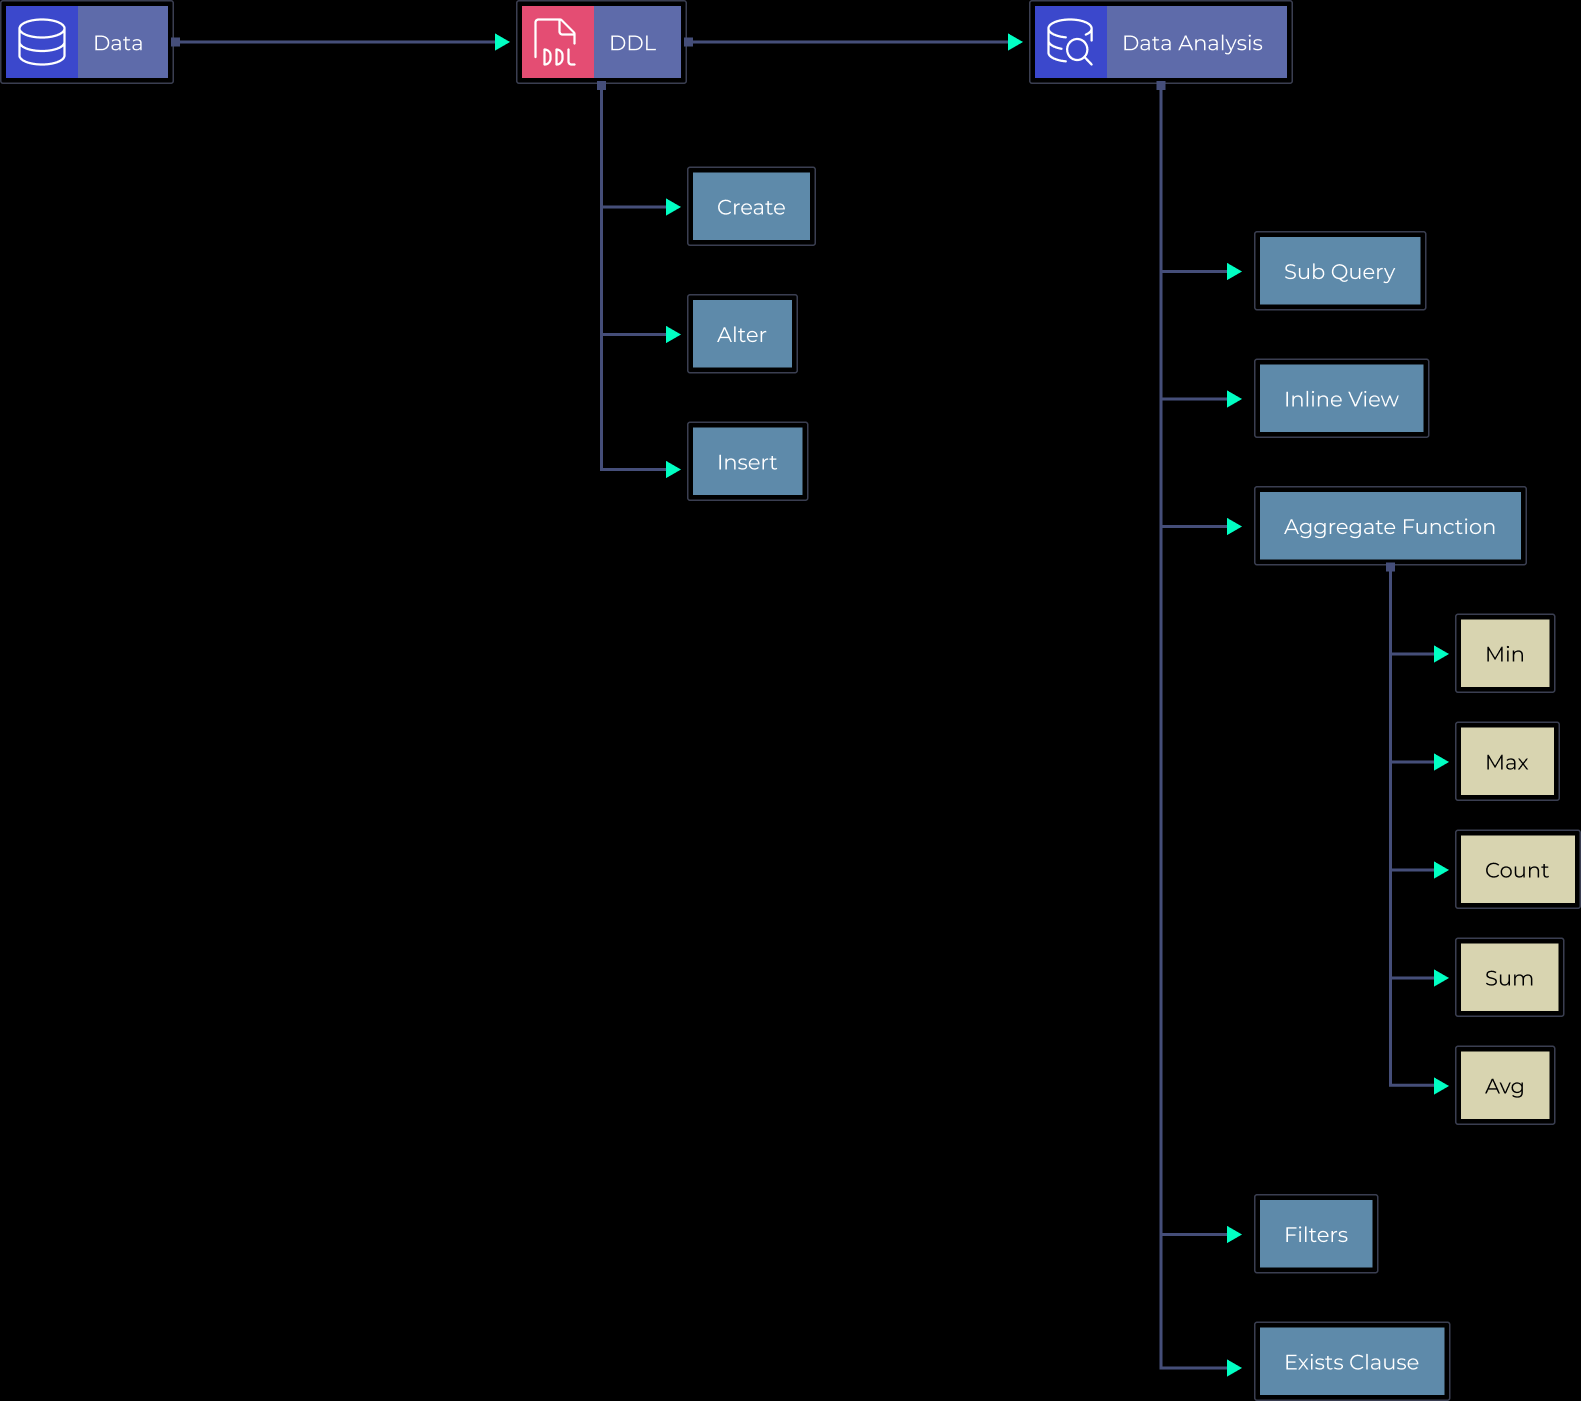

# In this SQL Project for Data Analysis, you will learn to efficiently write sub-queries and analyse data using various SQL functions and operators.

- Understanding the project and how to use Oracle SQL Developer
- Understanding the basics of data analysis, SQL commands, and their application
- Understanding the use of Oracle SQL Developer
- Understanding different types of aggregate functions(Min, Max, Count, Avg).
- Understanding different types of clauses.
- Data analysis using Sub-query.
- Understanding the background process of Sub-query.
- Understanding the inline view.
- Combine different aggregate results in a single row.
- Data analysis using Group-by clause.
- Data analysis using EXISTS clause.
- Filtering and organizing aggregated data

In [ ]:
SELECT * FROM LOCATIONS;
SELECT * FROM DEPARTMENTS;
SELECT * FROM JOBS;
SELECT * FROM EMPLOYEES;
SELECT * FROM JOB_HISTORY;
SELECT * FROM REGIONS;
SELECT * FROM COUNTRIES;
SELECT * FROM NON_FUNCTIONAL_LOCATIONS;




/************************** 1. Data analysis using Sub-query **************************/
-- if we want data from only one table then we must use sub-query, join is very useful for data need from multiple table

--Find all the departments where employees are tagged to it.
SELECT DEPARTMENT_ID, DEPARTMENT_NAME
FROM DEPARTMENTS
WHERE DEPARTMENT_ID IN (SELECT DEPARTMENT_ID
                        FROM EMPLOYEES);

--Implement it with join
SELECT DISTINCT DEPARTMENTS.DEPARTMENT_ID,
DEPARTMENTS.DEPARTMENT_NAME
FROM EMPLOYEES JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID;


-- Find employee details who belongs to marketing department and has salary less then or equal to 6000
-- and working as 'Marketing Representative'.

SELECT * FROM EMPLOYEES
WHERE DEPARTMENT_ID = (SELECT DEPARTMENT_ID
                        FROM DEPARTMENTS
                        WHERE DEPARTMENT_NAME = 'Marketing')
AND JOB_ID = (SELECT JOB_ID
              FROM JOBS
              WHERE JOB_TITLE = 'Marketing Representative')
AND SALARY <= 6000;




In [ ]:

/************************** 2. Inline view: List down all the employees along with department name and city where city is 'Roma' **************************/

--List down only those employees along with department name and city where city is 'Roma' or 'Venice' or 'Southlake'.
SELECT EMPLOYEES.EMPLOYEE_ID,
  EMPLOYEES.FIRST_NAME,
  DEPARTMENTS.DEPARTMENT_NAME,
  LOCATIONS.CITY
FROM EMPLOYEES
JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
JOIN LOCATIONS
ON DEPARTMENTS.LOCATION_ID = LOCATIONS.LOCATION_ID
AND CITY                  IN ('Roma', 'Venice', 'Southlake')
ORDER BY EMPLOYEES.EMPLOYEE_ID;


--List down all the employees along with department name and city where city is 'Roma' or 'Venice' or 'Southlake'.
SELECT EMPLOYEES.EMPLOYEE_ID,
  EMPLOYEES.FIRST_NAME,
  DEPARTMENTS.DEPARTMENT_NAME,
  LOCATIONS.CITY
FROM EMPLOYEES
LEFT JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
LEFT JOIN LOCATIONS
ON DEPARTMENTS.LOCATION_ID = LOCATIONS.LOCATION_ID
AND CITY                  IN ('Roma', 'Venice', 'Southlake')
ORDER BY EMPLOYEES.EMPLOYEE_ID;


--List down all the employees along with department name and city where city is 'Roma' or 'Venice' or 'Southlake'.
--NOTE: department and city both details should populate only if city belongs to 'Roma' or 'Venice' or 'Southlake'.
-- inline view

SELECT EMPLOYEES.EMPLOYEE_ID,
  EMPLOYEES.FIRST_NAME,
  DEPT_CITY.DEPARTMENT_NAME,
  DEPT_CITY.CITY
FROM EMPLOYEES
LEFT JOIN
  (SELECT DEPARTMENTS.DEPARTMENT_ID,
    DEPARTMENTS.DEPARTMENT_NAME,
    LOCATIONS.CITY
  FROM DEPARTMENTS
  JOIN LOCATIONS
  ON DEPARTMENTS.LOCATION_ID             = LOCATIONS.LOCATION_ID
  AND CITY                              IN ('Roma', 'Venice', 'Southlake')
  ) DEPT_CITY
ON EMPLOYEES.DEPARTMENT_ID = DEPT_CITY.DEPARTMENT_ID
ORDER BY EMPLOYEES.EMPLOYEE_ID;


In [ ]:

/************************** 3. Aggregate Function: Min, Max, Count, Sum, Avg **************************/

--Find max salary of an employee.
SELECT MAX(SALARY) AS MAX_SALARY FROM EMPLOYEES;

--List down the employees who are getting maximum salary.
SELECT * FROM EMPLOYEES
WHERE SALARY = (SELECT MAX(SALARY) AS MAX_SALARY FROM EMPLOYEES);


--Find min salary of an employee.
SELECT MIN(SALARY) AS MIN_SALARY FROM EMPLOYEES;

--List down the employees who are getting lowest salary.
SELECT * FROM EMPLOYEES
WHERE SALARY = (SELECT MIN(SALARY) AS MAX_SALARY FROM EMPLOYEES);


--Find total salary given to employees.
SELECT SUM(SALARY) AS SUM_OF_SALARY FROM EMPLOYEES;


--Find average salary of employees.
SELECT ROUND(AVG(SALARY), 2) AS SUM_OF_SALARY FROM EMPLOYEES;

--List down the employees who are getting more then average salary.
SELECT * FROM EMPLOYEES
WHERE SALARY > (SELECT ROUND(AVG(SALARY), 2) AS SUM_OF_SALARY FROM EMPLOYEES)
ORDER BY SALARY;

--Find total number of employees.
SELECT COUNT(*) FROM EMPLOYEES;


--Find maximum salary and number of employees who are working in IT department and hired after 29-Nov-1990.
SELECT MAX(SALARY) AS "MAX_SALARY_OF_IT", COUNT(*) AS "NUMBER_OF_EMP_IN_IT"
FROM EMPLOYEES
WHERE DEPARTMENT_ID =
  (SELECT DEPARTMENT_ID
  FROM DEPARTMENTS
  WHERE DEPARTMENT_NAME = 'IT'
  )
AND HIRE_DATE > TO_DATE('29-NOV-1990', 'dd-MON-yyyy');


--Find minimum salary and number of employees who are working in Finance department and hired after 29-Jan-1987.
SELECT MIN(SALARY) AS "MIN_SALARY_OF_FINANCE", COUNT(*) AS "NUMBER_OF_EMP_IN_FINANCE"
FROM EMPLOYEES
WHERE DEPARTMENT_ID =
  (SELECT DEPARTMENT_ID
  FROM DEPARTMENTS
  WHERE DEPARTMENT_NAME = 'Finance'
  )
AND HIRE_DATE > TO_DATE('29-JAN-1987', 'dd-MON-yyyy');


--Find average salary and number of employees who are working in Human Resources department.
SELECT ROUND(AVG(SALARY),2) AS "AVERAGE_SALARY_OF_HR", COUNT(*) AS "NUMBER_OF_EMP_IN_HR"
FROM EMPLOYEES
WHERE DEPARTMENT_ID =
  (SELECT DEPARTMENT_ID
  FROM DEPARTMENTS
  WHERE DEPARTMENT_NAME = 'Human Resources'
  );

SELECT * FROM NON_FUNCTIONAL_LOCATIONS;

--Add new location in NON_FUNCTIONAL_LOCATIONS table.
INSERT INTO NON_FUNCTIONAL_LOCATIONS(LOCATION_ID, POSTAL_CODE, CITY, COUNTRY_ID)
VALUES((SELECT MAX(LOCATION_ID)+1 FROM NON_FUNCTIONAL_LOCATIONS), 40000, 'Mumbai', 'IN');

INSERT INTO NON_FUNCTIONAL_LOCATIONS(LOCATION_ID, POSTAL_CODE, CITY, COUNTRY_ID)
VALUES((SELECT MAX(LOCATION_ID)+1 FROM NON_FUNCTIONAL_LOCATIONS), 40001, 'xyz', 'IN');

SELECT * FROM NON_FUNCTIONAL_LOCATIONS;




In [ ]:

/************************** 4. Combine different aggregated results in one row **************************/
--------------------------------------------------------------------------------

--Combine the aggregated results in multiple rows
SELECT 'min_salary' as record_type, MIN(SALARY) AS "SALARY", COUNT(*) AS "NUMBER_OF_EMP_IN_FINANCE"
FROM EMPLOYEES
WHERE DEPARTMENT_ID =
  (SELECT DEPARTMENT_ID
  FROM DEPARTMENTS
  WHERE DEPARTMENT_NAME = 'Finance'
  )
AND HIRE_DATE > TO_DATE('29-JAN-1987', 'dd-MON-yyyy')
UNION ALL
SELECT 'avg_salary', ROUND(AVG(SALARY),2) AS "SALARY", COUNT(*) AS "NUMBER_OF_EMP_IN_HR"
FROM EMPLOYEES
WHERE DEPARTMENT_ID =
  (SELECT DEPARTMENT_ID
  FROM DEPARTMENTS
  WHERE DEPARTMENT_NAME = 'Human Resources'
  );

--Combine the aggregated results in a single row
SELECT MAX(TOTAL_NUMBER_OF_EMPLOYEES) AS TOTAL_NUMBER_OF_EMPLOYEES,
  MAX(SUM_OF_SALARIES)      AS SUM_OF_SALARIES,
  MAX(MAX_SALARY_OF_IT)          AS MAX_SALARY_OF_IT,
  MAX(NUMBER_OF_EMP_IN_IT)       AS NUMBER_OF_EMP_IN_IT,
  MAX(MIN_SALARY_OF_FINANCE)     AS MIN_SALARY_OF_FINANCE,
  MAX(NUMBER_OF_EMP_IN_FINANCE)  AS NUMBER_OF_EMP_IN_FINANCE,
  MAX(AVERAGE_SALARY_OF_HR)      AS AVERAGE_SALARY_OF_HR,
  MAX(NUMBER_OF_EMP_IN_HR)       AS NUMBER_OF_EMP_IN_HR
FROM
  (
   SELECT SUM(SALARY) AS "SUM_OF_SALARIES",
    NULL              AS TOTAL_NUMBER_OF_EMPLOYEES,
    NULL              AS MAX_SALARY_OF_IT,
    NULL              AS NUMBER_OF_EMP_IN_IT,
    NULL              AS MIN_SALARY_OF_FINANCE,
    NULL              AS NUMBER_OF_EMP_IN_FINANCE,
    NULL              AS AVERAGE_SALARY_OF_HR,
    NULL              AS NUMBER_OF_EMP_IN_HR
  FROM EMPLOYEES
  UNION ALL
  SELECT NULL,
    COUNT(*) AS "TOTAL_NUMBER_OF_EMPLOYEES",
    NULL,
    NULL,
    NULL,
    NULL,
    NULL,
    NULL
  FROM EMPLOYEES
  UNION ALL
  SELECT NULL,
    NULL,
    MAX(SALARY) AS "MAX_SALARY_OF_IT",
    COUNT(*)    AS "NUMBER_OF_EMP_IN_IT",
    NULL,
    NULL,
    NULL,
    NULL
  FROM EMPLOYEES
  WHERE DEPARTMENT_ID =
    (SELECT DEPARTMENT_ID FROM DEPARTMENTS WHERE DEPARTMENT_NAME = 'IT'
    )
  AND HIRE_DATE > TO_DATE('29-NOV-1990', 'dd-MON-yyyy')
  UNION ALL
  SELECT NULL,
    NULL,
    NULL,
    NULL,
    MIN(SALARY) AS "MIN_SALARY_OF_FINANCE",
    COUNT(*)    AS "NUMBER_OF_EMP_IN_FINANCE",
    NULL,
    NULL
  FROM EMPLOYEES
  WHERE DEPARTMENT_ID =
    (SELECT DEPARTMENT_ID FROM DEPARTMENTS WHERE DEPARTMENT_NAME = 'Finance'
    )
  AND HIRE_DATE > TO_DATE('29-JAN-1987', 'dd-MON-yyyy')
  UNION ALL
  SELECT NULL,
    NULL,
    NULL,
    NULL,
    NULL,
    NULL,
    ROUND(AVG(SALARY),2) AS "AVERAGE_SALARY_OF_HR",
    COUNT(*)             AS "NUMBER_OF_EMP_IN_HR"
  FROM EMPLOYEES
  WHERE DEPARTMENT_ID =
    (SELECT DEPARTMENT_ID
    FROM DEPARTMENTS
    WHERE DEPARTMENT_NAME = 'Human Resources'
    )
  ) T ;
--) ;


In [ ]:

/************************** 5. Department wise data analysis **************************/

--Show department wise maximum salary
SELECT DEPARTMENTS.DEPARTMENT_NAME,
  MAX(SALARY) AS "MAX_SALARY"
FROM EMPLOYEES
JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID     = DEPARTMENTS.DEPARTMENT_ID
WHERE EMPLOYEES.DEPARTMENT_ID IS NOT NULL
GROUP BY DEPARTMENTS.DEPARTMENT_NAME;


--Show department wise number of employees, maximum salary and sum of salary
SELECT DEPARTMENTS.DEPARTMENT_NAME,
  COUNT(*)    AS "NUMBER_OF_EMPLOYEES",
  MAX(SALARY) AS "MAX_SALARY",
  SUM(SALARY) AS "TOTAL_SALARY",
  ROUND(AVG(SALARY),2) AS "Avg_SALARY"
FROM EMPLOYEES
JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID     = DEPARTMENTS.DEPARTMENT_ID
WHERE EMPLOYEES.DEPARTMENT_ID IS NOT NULL
GROUP BY DEPARTMENTS.DEPARTMENT_NAME;


--Show location wise number of department
SELECT * FROM departments;

SELECT LOCATIONS_ID, COUNT(*) AS "NUMBER_OF_DEPT"
FROM DEPARTMENTS
GROUP BY LOCATION_ID

SELECT LOCATIONS.CITY,
  COUNT(*) AS "NUMBER_OF_DEPT"
FROM DEPARTMENTS,
  LOCATIONS
WHERE LOCATIONS.LOCATION_ID = DEPARTMENTS.LOCATION_ID
GROUP BY LOCATIONS.CITY;


--Show number of employees working under each manager along with manager's employee id
SELECT M.EMPLOYEE_ID                AS "MANAGER'S_EMPLOYEE_ID",
  M.FIRST_NAME || ' '|| M.LAST_NAME AS "MANAGER_NAME",
  COUNT(*)                          AS "NUMBER_OF_EMP_WORKING_UNDER_MANAGER"
FROM EMPLOYEES E
JOIN EMPLOYEES M
ON E.MANAGER_ID = M.EMPLOYEE_ID
GROUP BY M.EMPLOYEE_ID,
  M.FIRST_NAME
  || ' '  || M.LAST_NAME;








In [ ]:
/************************** 6. Filter and organize aggregated data **************************/

SELECT *
FROM JOB_HISTORY;

SELECT DEPARTMENTS.DEPARTMENT_NAME, COUNT(*) AS "NUMBER_OF_EMPLOYEES_RESIGNED"
FROM JOB_HISTORY JOIN DEPARTMENTS
ON JOB_HISTORY.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
GROUP BY DEPARTMENTS.DEPARTMENT_NAME;

SELECT JOB_HISTORY.DEPARTMENT_ID,
  DEPARTMENTS.DEPARTMENT_NAME,
  COUNT(*) AS "NUMBER_OF_EMPLOYEES_RESIGNED"
FROM JOB_HISTORY
JOIN DEPARTMENTS
ON JOB_HISTORY.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
GROUP BY JOB_HISTORY.DEPARTMENT_ID,
  DEPARTMENTS.DEPARTMENT_NAME
ORDER BY NUMBER_OF_EMPLOYEES_RESIGNED DESC;

--Show department wise resignation number in an ordered way
SELECT JOB_HISTORY.DEPARTMENT_ID,
  DEPARTMENTS.DEPARTMENT_NAME,
  COUNT(*) AS "NUMBER_OF_EMPLOYEES_RESIGNED"
FROM JOB_HISTORY
JOIN DEPARTMENTS
ON JOB_HISTORY.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
GROUP BY JOB_HISTORY.DEPARTMENT_ID,
  DEPARTMENTS.DEPARTMENT_NAME
HAVING COUNT(*) > 1
ORDER BY NUMBER_OF_EMPLOYEES_RESIGNED DESC;


--Same results with inline view
SELECT *
FROM
  (SELECT JOB_HISTORY.DEPARTMENT_ID,
    DEPARTMENTS.DEPARTMENT_NAME,
    COUNT(*) AS "NUMBER_OF_EMPLOYEES_RESIGNED"
  FROM JOB_HISTORY
  JOIN DEPARTMENTS
  ON JOB_HISTORY.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID
  GROUP BY JOB_HISTORY.DEPARTMENT_ID,
    DEPARTMENTS.DEPARTMENT_NAME
  ORDER BY NUMBER_OF_EMPLOYEES_RESIGNED DESC
  ) T
WHERE NUMBER_OF_EMPLOYEES_RESIGNED > 1;


--Show department wise maximum salary in an ordered way where max salary should be more then 10000
SELECT DEPARTMENTS.DEPARTMENT_NAME,
  MAX(SALARY) AS "MAX_SALARY"
FROM EMPLOYEES
JOIN DEPARTMENTS
ON EMPLOYEES.DEPARTMENT_ID     = DEPARTMENTS.DEPARTMENT_ID
WHERE EMPLOYEES.DEPARTMENT_ID IS NOT NULL
GROUP BY DEPARTMENTS.DEPARTMENT_NAME
HAVING MAX(SALARY) > 10000
ORDER BY MAX_SALARY ASC,
  DEPARTMENT_NAME DESC;



In [ ]:
/************************** 7. Show department level details using aggregate function and inline view **************************/


SELECT DEPARTMENTS.DEPARTMENT_ID,
  DEPARTMENT_NAME,
  EMPLOYEES.FIRST_NAME
  || ' '
  || EMPLOYEES.LAST_NAME AS MANAGER_NAME,
  LOCATIONS.CITY,
  MAX_SALARY,
  MIN_SALARY,
  AVG_SALARY,
  SUM_SALARY,
  NUMBER_OF_EMP,
  NUMBER_OF_EMP_RESIGNED
FROM DEPARTMENTS
LEFT JOIN EMPLOYEES
ON DEPARTMENTS.MANAGER_ID = EMPLOYEES.EMPLOYEE_ID
LEFT JOIN LOCATIONS
ON DEPARTMENTS.LOCATION_ID = LOCATIONS.LOCATION_ID
LEFT JOIN
  (SELECT DEPARTMENT_ID,
    MAX(SALARY)           AS MAX_SALARY,
    MIN(SALARY)           AS MIN_SALARY,
    ROUND(AVG(SALARY), 2) AS AVG_SALARY,
    SUM(SALARY)           AS SUM_SALARY,
    COUNT(*)              AS NUMBER_OF_EMP
  FROM EMPLOYEES
  GROUP BY DEPARTMENT_ID
  ) DEPT_SAL_DET
ON DEPARTMENTS.DEPARTMENT_ID = DEPT_SAL_DET.DEPARTMENT_ID
LEFT JOIN
  (SELECT DEPARTMENT_ID,
    COUNT(*) AS NUMBER_OF_EMP_RESIGNED
  FROM JOB_HISTORY
  GROUP BY DEPARTMENT_ID
  ) EMP_RESIGNATION_DET
ON DEPARTMENTS.DEPARTMENT_ID = EMP_RESIGNATION_DET.DEPARTMENT_ID
ORDER BY DEPARTMENTS.DEPARTMENT_ID;




In [ ]:
/************************** 8. Data analysis using Sub-query and EXISTS clause **************************/
SELECT * FROM EMPLOYEES JOIN DEPARTMENTS ON EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID;

--Find all the departments where employees are tagged to it.
SELECT *
FROM DEPARTMENTS
WHERE EXISTS (SELECT 1 FROM EMPLOYEES WHERE EMPLOYEES.DEPARTMENT_ID = DEPARTMENTS.DEPARTMENT_ID);


--Find all the employees who has resigned.
SELECT *
FROM EMPLOYEES
WHERE EXISTS (SELECT 1 FROM JOB_HISTORY WHERE JOB_HISTORY.EMPLOYEE_ID = EMPLOYEES.EMPLOYEE_ID);


SELECT *
FROM EMPLOYEES
WHERE EXISTS (SELECT EMPLOYEES.JOB_ID FROM JOB_HISTORY WHERE JOB_HISTORY.EMPLOYEE_ID = EMPLOYEES.EMPLOYEE_ID);


--Results of EXISTS and IN are same just the internal execution if different.
SELECT *
FROM EMPLOYEES
WHERE EXISTS (SELECT 1 FROM DEPARTMENTS WHERE DEPARTMENTS.DEPARTMENT_ID = EMPLOYEES.DEPARTMENT_ID);

SELECT *
FROM EMPLOYEES
WHERE EMPLOYEES.DEPARTMENT_ID IN (SELECT DEPARTMENTS.DEPARTMENT_ID FROM DEPARTMENTS);

--Difference between NOT EXISTS and NOT IN

/*
The EXISTS clause is much faster than IN when the subquery results is very large.
Conversely, the IN clause is faster than EXISTS when the subquery results is very small.

Also, the IN clause can't compare anything with NULL values, but the EXISTS clause can compare everything with NULLs.
*/

SELECT *
FROM EMPLOYEES
WHERE NOT EXISTS (SELECT 1 FROM DEPARTMENTS WHERE DEPARTMENTS.DEPARTMENT_ID = EMPLOYEES.DEPARTMENT_ID);


-- NOT IN doesnt work with NULL values
SELECT *
FROM EMPLOYEES
WHERE EMPLOYEES.DEPARTMENT_ID NOT IN (SELECT DEPARTMENTS.DEPARTMENT_ID FROM DEPARTMENTS);


